# **Анализ данных пассажирских авиаперевозок из города Анапа в зимние месяцы 2017 г.**

### **Краткое описание задачи:** </br>
> ***С помощью запроса SQL мы подготовили датасет с данными, о всех совершённых рейсах из города Анапа в январе, феврале и декабре 2017 г.</br>
Наша задача — проанализировать данные и найти наименее прибыльные из рейсов. Прибыльность рейса — это разница между доходом от продаж билетов и расходом на полет.***  

## Импорт библиотек

In [568]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

## Загружаем данные

In [569]:
df = pd.read_csv('data/data_AAQ.csv')

## Знакомство

In [570]:
df.sample(15)

,flight_id,departure_airport,arrival_city,aircraft_code,actual_departure,duration_minutes,seats_available,tickets_sold,capacity_perc,tickets_revenue
86,136383,AAQ,Moscow,733,2017-01-25T10:09:00Z,102.0,130,106,81.538462,1493200.0
26,136781,AAQ,Belgorod,SU9,2017-01-14T09:26:00Z,50.0,97,97,100.000000,765300.0
114,136178,AAQ,Moscow,733,2017-01-29T10:10:00Z,99.0,130,99,76.153846,1434600.0
29,136769,AAQ,Belgorod,SU9,2017-02-10T09:30:00Z,51.0,97,88,90.721649,696000.0
34,136754,AAQ,Belgorod,SU9,2017-02-06T09:29:00Z,49.0,97,90,92.783505,721200.0
47,136649,AAQ,Belgorod,SU9,2017-01-18T09:25:00Z,50.0,97,96,98.969072,759000.0
41,136672,AAQ,Belgorod,SU9,2017-02-03T09:28:00Z,50.0,97,96,98.969072,759000.0
90,136348,AAQ,Moscow,733,2017-02-10T10:05:00Z,100.0,130,120,92.307692,1762800.0
12,136871,AAQ,Belgorod,SU9,2017-01-13T09:28:00Z,50.0,97,97,100.000000,765300.0
100,136270,AAQ,Moscow,733,2017-02-12T10:12:00Z,99.0,130,111,85.384615,1628600.0


In [571]:
# кол-во строк и стобцов
df.shape

(127, 10)

In [572]:
# данные по столбцам
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flight_id          127 non-null    int64  
 1   departure_airport  127 non-null    object 
 2   arrival_city       127 non-null    object 
 3   aircraft_code      127 non-null    object 
 4   actual_departure   127 non-null    object 
 5   duration_minutes   127 non-null    float64
 6   seats_available    127 non-null    int64  
 7   tickets_sold       127 non-null    int64  
 8   capacity_perc      127 non-null    float64
 9   tickets_revenue    127 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 10.0+ KB


### Пробежимся по названиям столбцов
* **flight_id** - ID рейса
* **departure_airport** - Код аэропрта отправления. В нашем случае имеется только один: AAQ(Анапа)
* **arrival_city** - Город прибытия
* **aircraft_code** - Код модели самолета
* **actual_departure** - Дата отправления самолёта
* **duration_minutes** - Длительность рейса в минутах
* **seats_available** - Кол-во доступных мест всех классов в самолете
* **tickets_sold** - Кол-во проданных билетов
* **capacity_perc** - Загруженность самолета / Процентное соотношение занятых сидений к пустым
* **tickets_revenue** - Суммарная прибыль по продажам билетов 

## Аналитика<br>
### Посмотрим распределение параметров

In [573]:
# вынесем месяц отдельным признаком
df['month'] = pd.to_datetime(df.actual_departure).dt.month

<AxesSubplot:xlabel='month'>

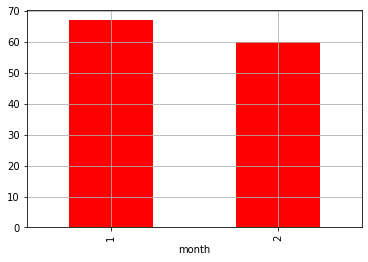

In [574]:
df.groupby(['month'])['flight_id'].nunique().plot(
    kind='bar', grid=True, color='r')

67 полётов в январе и 60 в феврале. Декабрь отсутствует, т.к срез базы данных был сделан в августе 2017. Так что все будущие рейсы, относительно августа 2017, не могут быть найдены в столбце actual_depature.<br>
Значит будем анализировать два оставшиеся месяца.

<AxesSubplot:title={'center':'Направления cостоявшихся рейсов'}>

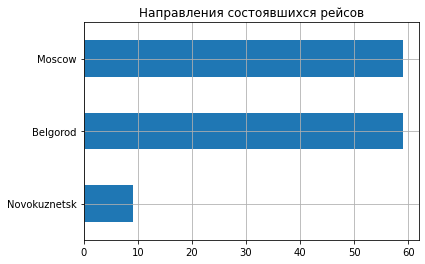

In [575]:
df.arrival_city.value_counts(ascending=True).plot(
    kind='barh', grid=True, title='Направления cостоявшихся рейсов')

Из Анапы в январе, феврале 2017 г. было только 3 направления. В Москву и Белгород было отправлено по 59 рейсов. В Новокузнецк - 9.

In [576]:
# сгруппируем данные по городу прибытия,месяцу, модели самолёта и макс. вместимости, и посмотрим статистику по длительности полета, загруженности самолета и прибыли
df.groupby(['arrival_city', 'aircraft_code', 'seats_available'])[['duration_minutes', 'capacity_perc',
                                                                 'tickets_revenue']].agg(['min', 'mean', 'max'])

duration_minutes              \
                                                        min        mean   
arrival_city aircraft_code seats_available                                
Belgorod     SU9           97                          49.0   50.084746   
Moscow       733           130                         98.0   99.830508   
Novokuznetsk 733           130                        299.0  306.666667   

                                                  capacity_perc             \
                                              max           min       mean   
arrival_city aircraft_code seats_available                                   
Belgorod     SU9           97                51.0     65.979381  92.975712   
Moscow       733           130              103.0     74.615385  87.014342   
Novokuznetsk 733           130              312.0      0.000000   0.000000   

                                                  tickets_revenue  \
                                              max             min   
arrival_city aircraft_code seats_available                          
Belgorod     SU9           97               100.0        531000.0   
Moscow       733           130              100.0       1398000.0   
Novokuznetsk 733           130                0.0             0.0   

                                                                     
                                                    mean        max  
arrival_city aircraft_code seats_available                           
Belgorod     SU9           97               7.104356e+05   765300.0  
Moscow       733           130              1.642576e+06  1886000.0  
Novokuznetsk 733           130              0.000000e+00        0.0

Что мы можем вынести из получившихся данных?<br>
1. Для полётов в Москву и Новокузнецк используется 130-местный Boeing 737-300, в Белгород - Sukhoi Superjet-100 на 97 мест.
2. Самый длительный маршрут из имеющихся — Анапа-Новокузнецк (около 5 часов), самый короткий — Анапа-Белгород (около 50 минут)
3. На первый взгляд, большинство рейсов до Белгорода и Москвы можно считать окупившимися. Согласно данным IATA, средняя заполняемость самолета в доковидную эпоху — 70%. И цены билетов устанавливаются так, что бы даже 70% заполненности приходились в плюс перевозчику. Это неофициальные данные, так что я не буду на них ссылаться, плюс, мы не знаем на сколько эти цифры применимы на просторах стран СНГ. В дальнейшем мы будем использовать цифру 75%.
4. В базе данных отсутствует информация по рейсам в Новокузнецк.<br>

In [577]:
# глянем детальные данные только по рейсам в Новокузнецк

df.loc[df['arrival_city'] == 'Novokuznetsk', :]

,flight_id,departure_airport,arrival_city,aircraft_code,actual_departure,duration_minutes,seats_available,tickets_sold,capacity_perc,tickets_revenue,month
59,136567,AAQ,Novokuznetsk,733,2017-02-14T06:12:00Z,311.0,130,0,0.0,0.0,2
60,136560,AAQ,Novokuznetsk,733,2017-01-24T06:13:00Z,305.0,130,0,0.0,0.0,1
61,136546,AAQ,Novokuznetsk,733,2017-01-03T06:13:00Z,302.0,130,0,0.0,0.0,1
62,136544,AAQ,Novokuznetsk,733,2017-01-31T06:10:00Z,304.0,130,0,0.0,0.0,1
63,136540,AAQ,Novokuznetsk,733,2017-01-17T06:14:00Z,307.0,130,0,0.0,0.0,1
64,136523,AAQ,Novokuznetsk,733,2017-01-10T06:14:00Z,312.0,130,0,0.0,0.0,1
65,136514,AAQ,Novokuznetsk,733,2017-02-07T06:14:00Z,299.0,130,0,0.0,0.0,2
66,136513,AAQ,Novokuznetsk,733,2017-02-28T06:13:00Z,310.0,130,0,0.0,0.0,2
67,136511,AAQ,Novokuznetsk,733,2017-02-21T06:15:00Z,310.0,130,0,0.0,0.0,2


Действительно, данные - отсутствуют. Мы не можем их проанализировать, так что перейдём к другим двум направлениям.

In [578]:
df2 = df.loc[df['arrival_city'].isin(['Moscow', 'Belgorod']), :]

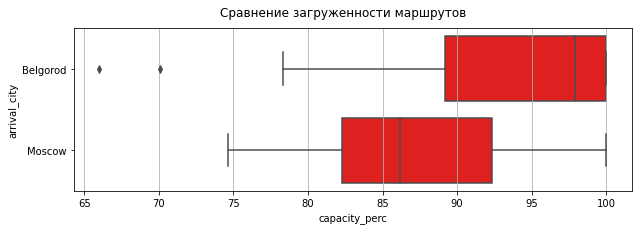

In [579]:
fig, ax = plt.subplots(figsize=(10, 3))
fig.suptitle('Сравнение загруженности маршрутов')
sns.boxplot(data=df2,
            y='arrival_city',
            x='capacity_perc',
            color="red")
ax.xaxis.grid(True)
fig.savefig('Сравнение загруженности маршрутов')

Наш график отчётливо показывает наличие двух выбросов с заполняемостью меньше 75% в рейсах в Белгород, и наличие минимума чуть меньше 75% в Московских рейсах. Пройдем к детальной аналитике этих рейсов

In [580]:
df2.loc[df2['capacity_perc'] < 75, :]

,flight_id,departure_airport,arrival_city,aircraft_code,actual_departure,duration_minutes,seats_available,tickets_sold,capacity_perc,tickets_revenue,month
24,136807,AAQ,Belgorod,SU9,2017-02-23T09:28:00Z,50.0,97,68,70.103093,531000.0,2
49,136642,AAQ,Belgorod,SU9,2017-01-30T09:28:00Z,49.0,97,64,65.979381,531000.0,1
88,136360,AAQ,Moscow,733,2017-02-05T10:08:00Z,100.0,130,97,74.615385,1455400.0,2
124,136122,AAQ,Moscow,733,2017-01-08T10:08:00Z,100.0,130,97,74.615385,1431000.0,1


Итого, у нас есть 4 рейса с заполняемостью меньше 75%: по 2 в каждый город. Причём московские рейсы очень близки к 75%. Чего не скажешь о рейсах 136807(состоявшимся 23.02), и 136642 (30.01) в Белгород. <br>
Попробуем рассчитать примерную стоимость топлива.<br>
Мне удалось отыскать цену авиакеросина в <a href="https://favt.gov.ru/dejatelnost-ajeroporty-i-ajerodromy-ceny-na-aviagsm/?id=7329">Аэропорту Анапы</a> (41435 р. на Январь 2017, 39553 р. в Февреле 2017) и средний расход топлива для <a href="http://newsruss.ru/doc/index.php/%D0%A0%D0%B0%D1%81%D1%85%D0%BE%D0%B4_%D1%82%D0%BE%D0%BF%D0%BB%D0%B8%D0%B2%D0%B0_%D1%83_%D1%81%D0%B0%D0%BC%D0%BE%D0%BB%D1%91%D1%82%D0%BE%D0%B2">моделей наших самолётов</a> (Boeing 737-300 : 2.4 т/ч; Sukhoi Superjet 100 : 1.7 т/ч)

In [581]:
# добавим столбец "месяц" для лёкгости подсчёта стоимости топлива
df2['month'] = pd.to_datetime(df2.actual_departure).dt.month

In [582]:
# словари для будущих трансформаций
d = {'SU9': 1.7, '733': 2.4}
m = {1: 41435, 2: 39553, 12: 47101}

In [583]:
# новый столбец - цена топлива. высчитываем из найденных данных
df2['jetfuel_cost'] = round(df2['aircraft_code'].map(
    d) * (df2['duration_minutes']/60) * df2.month.map(m) * 1.2)  # добавим ещё 20%

Я решил увеличить затраты на 20 процентов, потому что настоящий расчёт топлива включает себя множество <a href="https://www.simcoders.com/2018/09/07/how-to-calculate-the-fuel-required-for-your-flight/">дополнительных параметров<a>.

In [584]:
# новый столбец - выручка
df2['income'] = df2['tickets_revenue'] - df2['jetfuel_cost']

In [585]:
# отсортируем данные по выручке и посмотрим результат
df2.sort_values(by='income').head(5)

,flight_id,departure_airport,arrival_city,aircraft_code,actual_departure,duration_minutes,seats_available,tickets_sold,capacity_perc,tickets_revenue,month,jetfuel_cost,income
49,136642,AAQ,Belgorod,SU9,2017-01-30T09:28:00Z,49.0,97,64,65.979381,531000.0,1,69031.0,461969.0
24,136807,AAQ,Belgorod,SU9,2017-02-23T09:28:00Z,50.0,97,68,70.103093,531000.0,2,67240.0,463760.0
17,136844,AAQ,Belgorod,SU9,2017-02-28T09:26:00Z,50.0,97,79,81.443299,575100.0,2,67240.0,507860.0
10,136887,AAQ,Belgorod,SU9,2017-01-20T09:30:00Z,49.0,97,78,80.412371,595200.0,1,69031.0,526169.0
6,136922,AAQ,Belgorod,SU9,2017-02-11T09:27:00Z,50.0,97,76,78.350515,607800.0,2,67240.0,540560.0


Наши расчеты дают нам лишь приблизительную картину, так как у нас нет данных по другим расходам (экипаж, техобслуживание самолёта, простой самолёта, работа диспетчеров и другие  менее явные расходы), что бы определить точную выручку.<br>Можно ещё расчитать процентное соотношение издержек на топливо и выручки от билетов, и попытаться найти точки пересечения данных

In [586]:
df2['fuel_tickets_ratio'] = round(
    (df2['jetfuel_cost']/df2['tickets_revenue'])*100, 2)

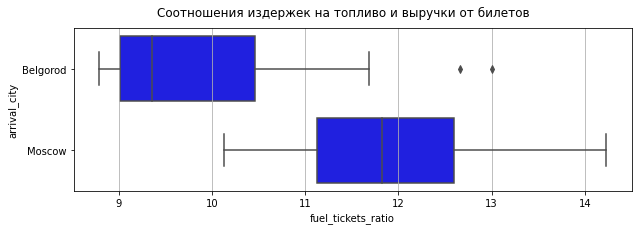

In [587]:
fig2, ax2 = plt.subplots(figsize=(10, 3))
fig2.suptitle('Соотношения издержек на топливо и выручки от билетов')
sns.boxplot(data=df2,
            y='arrival_city',
            x='fuel_tickets_ratio',
            color="b")
ax2.xaxis.grid(True)
fig2.savefig('Соотношения издержек на топливо и выручки от билетов')

In [588]:
# по 2 рейса для каждого города с самым большими издержаками на топливо по отношению к прибыли по проданным билетам.
# 3 из них являются наименее загруженными со всего датасета.
df2.loc[df['arrival_city'] == 'Moscow'].sort_values(by='fuel_tickets_ratio', ascending=False)[:2].append(
    df2.loc[df['arrival_city'] == 'Belgorod'].sort_values(by='fuel_tickets_ratio', ascending=False)[:2])

,flight_id,departure_airport,arrival_city,aircraft_code,actual_departure,duration_minutes,seats_available,tickets_sold,capacity_perc,tickets_revenue,month,jetfuel_cost,income,fuel_tickets_ratio
72,136464,AAQ,Moscow,733,2017-01-09T10:07:00Z,100.0,130,100,76.923077,1398000.0,1,198888.0,1199112.0,14.23
124,136122,AAQ,Moscow,733,2017-01-08T10:08:00Z,100.0,130,97,74.615385,1431000.0,1,198888.0,1232112.0,13.90
49,136642,AAQ,Belgorod,SU9,2017-01-30T09:28:00Z,49.0,97,64,65.979381,531000.0,1,69031.0,461969.0,13.00
24,136807,AAQ,Belgorod,SU9,2017-02-23T09:28:00Z,50.0,97,68,70.103093,531000.0,2,67240.0,463760.0,12.66


# Выводы
* Потенциально убыточными могут являться рейсы: 136807, 136642, 136360, 136122 как наименее загруженные. И дополнительно 136464 имеющий самые большие издержки по отношению к прибыли. Необходима более детальная проверка и дополнительные данные. 
* Маршрут до Новокузнецка, к сожалению, не может быть изучен ввиду отсутствия данных.